In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

614

In [6]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | borogontsy
Processing Record 2 of Set 1 | shenzhen
Processing Record 3 of Set 1 | abong mbang
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | sur
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | fort nelson
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | viligili
City not found. Skipping...
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | port-cartier
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | gavle
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | pizarro
P

In [8]:
len(city_data)

554

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Borogontsy,62.6683,131.1683,29.61,86,100,7.96,RU,2022-04-14 01:49:32
1,Shenzhen,22.5455,114.0683,81.84,77,0,6.96,CN,2022-04-14 01:47:54
2,Abong Mbang,3.9833,13.1833,68.83,94,100,2.62,CM,2022-04-14 01:49:33
3,Busselton,-33.6500,115.3333,65.19,54,0,7.56,AU,2022-04-14 01:49:33
4,Sur,22.5667,59.5289,84.51,32,6,4.56,OM,2022-04-14 01:49:33
5,Tasiilaq,65.6145,-37.6368,28.56,86,100,6.31,GL,2022-04-14 01:49:34
6,Castro,-24.7911,-50.0119,61.18,97,46,0.40,BR,2022-04-14 01:47:49
7,Codrington,-38.2667,141.9667,73.22,35,100,11.90,AU,2022-04-14 01:49:34
8,Mar Del Plata,-38.0023,-57.5575,59.88,79,0,8.01,AR,2022-04-14 01:45:36
9,Fort Nelson,58.8053,-122.7002,27.99,22,20,4.61,CA,2022-04-14 01:45:18


In [10]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Borogontsy,RU,2022-04-14 01:49:32,62.6683,131.1683,29.61,86,100,7.96
1,Shenzhen,CN,2022-04-14 01:47:54,22.5455,114.0683,81.84,77,0,6.96
2,Abong Mbang,CM,2022-04-14 01:49:33,3.9833,13.1833,68.83,94,100,2.62
3,Busselton,AU,2022-04-14 01:49:33,-33.6500,115.3333,65.19,54,0,7.56
4,Sur,OM,2022-04-14 01:49:33,22.5667,59.5289,84.51,32,6,4.56
5,Tasiilaq,GL,2022-04-14 01:49:34,65.6145,-37.6368,28.56,86,100,6.31
6,Castro,BR,2022-04-14 01:47:49,-24.7911,-50.0119,61.18,97,46,0.40
7,Codrington,AU,2022-04-14 01:49:34,-38.2667,141.9667,73.22,35,100,11.90
8,Mar Del Plata,AR,2022-04-14 01:45:36,-38.0023,-57.5575,59.88,79,0,8.01
9,Fort Nelson,CA,2022-04-14 01:45:18,58.8053,-122.7002,27.99,22,20,4.61


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1649901308.091887

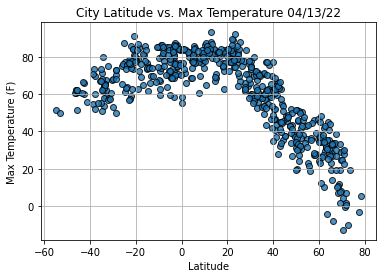

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

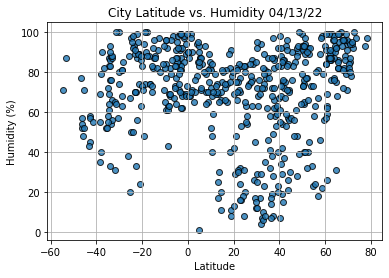

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

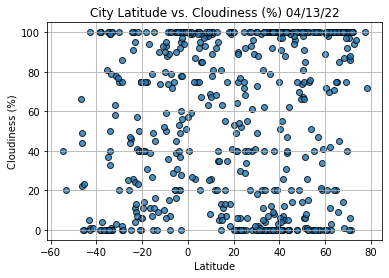

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

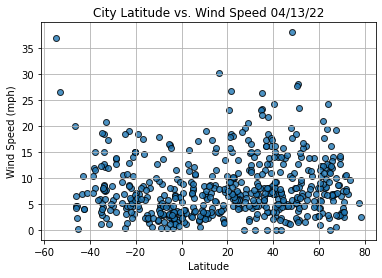

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# The slope, intercept, r_value, p_value, and std_errare always returned when we run the linregress function. If you don't want to calculate one of these values but do not add it inside the parentheses, you'll get a ValueError: too many values to unpack.
# To prevent this error, add a comma and underscore for each value you don't want to calculate.
# For instance, if you don't want to print out the p-value and the standard error, write your function as (slope, intercept, r_value, _, _) = linregress(x, y).

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [26]:
# In statistics, the p-value is used to determine significance of results. In most cases, data scientists like to use a significance level of 0.05, which means:
# A linear regression with a p-value > 0.05 is not statistically significant.
# A linear regression with a p-value < 0.05 is statistically significant.
# P-values can also be used to justify rejecting a null hypothesis. We will discuss p-values and hypothesis testing in more detail later in the course

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

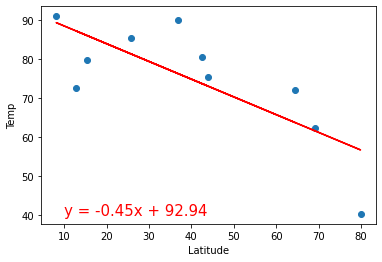

In [27]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# Let's review what this code does:
   # We plot the latitudes and temperatures on a scatter plot.
   # We create a line plot of our regression line with the ideal temperatures.
   # We annotate the line plot by adding the equation of our regression line, where the x-axis is 10 and the y-axis is 40, and specify the font and color.
   # We create x- and y-axes labels.